# Stock Price Prediction Using Technical Indicators and Machine Learning

    This project aims to predict future stock prices (or stock price movement direction) by leveraging technical indicators derived from historical market data and applying machine learning algorithms for pattern recognition and forecasting.

    Steps 
1. [Importing the data](#Importing-the-data)
   The step includes data explanation.
2. [Predicting by using technical indicators](#Predicting-by-using-technical-indicators)
3. [Another stock testing (CVX)](#CVX)
4. [Results](#results)


In [60]:
import yfinance as yf 
import ta
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Importing the data

#### AMD

In [61]:
df = pd.read_csv("../data/amd_data.csv")

In [62]:
df

,Date,Close,Open,High,Low,Volume,momentum_rsi,momentum_stoch,momentum_roc,momentum_wr,trend_macd,trend_macd_signal,trend_ema_fast,trend_ema_slow,volatility_bbh,volatility_bbl,volatility_atr
0,2015-02-20,3.060000,3.030000,3.130000,3.020000,10666700,60.597387,56.944440,10.869564,-43.055560,0.127181,0.128352,3.017328,2.890147,3.377431,2.414569,0.132561
1,2015-02-23,3.060000,3.050000,3.100000,3.030000,6323500,60.597387,55.072460,7.368423,-44.927540,0.121164,0.126915,3.023893,2.902729,3.366558,2.486442,0.126305
2,2015-02-24,3.110000,3.060000,3.120000,3.020000,10916300,62.993571,57.377043,-6.042298,-42.622957,0.119058,0.125343,3.037140,2.918082,3.373224,2.529776,0.123674
3,2015-02-25,3.100000,3.080000,3.140000,3.060000,6151300,62.179140,46.000004,2.310229,-53.999996,0.115253,0.123325,3.046811,2.931558,3.381391,2.561609,0.119307
4,2015-02-26,3.080000,3.100000,3.130000,3.060000,8680900,60.494568,53.571383,1.315788,-46.428617,0.109363,0.120533,3.051917,2.942554,3.374810,2.613190,0.114376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,2025-11-07,233.539993,230.940002,235.869995,224.639999,52162600,51.272053,20.970774,1.437692,-79.029226,13.275143,17.364242,245.446128,232.170986,270.815879,215.956118,12.556381
2697,2025-11-10,243.979996,242.139999,248.899994,240.500000,43361600,56.150155,45.570222,3.825690,-54.429778,12.174842,16.326362,245.220570,233.045727,269.247469,220.280528,12.836743
2698,2025-11-11,237.520004,241.660004,248.460007,234.639999,61336800,52.638648,30.348748,-6.088879,-69.651252,10.658712,15.192832,244.035867,233.377155,267.272901,224.198096,12.935070
2699,2025-11-12,258.890015,253.130005,263.510010,250.000000,108942000,61.267867,80.702228,-0.300381,-19.297772,11.054124,14.365090,246.321121,235.266997,268.753819,224.746180,14.240563


### Preperation before predicting

In [63]:
# next day's closing price
df['Target'] = df['Close'].shift(-1)
df

,Date,Close,Open,High,Low,Volume,momentum_rsi,momentum_stoch,momentum_roc,momentum_wr,trend_macd,trend_macd_signal,trend_ema_fast,trend_ema_slow,volatility_bbh,volatility_bbl,volatility_atr,Target
0,2015-02-20,3.060000,3.030000,3.130000,3.020000,10666700,60.597387,56.944440,10.869564,-43.055560,0.127181,0.128352,3.017328,2.890147,3.377431,2.414569,0.132561,3.060000
1,2015-02-23,3.060000,3.050000,3.100000,3.030000,6323500,60.597387,55.072460,7.368423,-44.927540,0.121164,0.126915,3.023893,2.902729,3.366558,2.486442,0.126305,3.110000
2,2015-02-24,3.110000,3.060000,3.120000,3.020000,10916300,62.993571,57.377043,-6.042298,-42.622957,0.119058,0.125343,3.037140,2.918082,3.373224,2.529776,0.123674,3.100000
3,2015-02-25,3.100000,3.080000,3.140000,3.060000,6151300,62.179140,46.000004,2.310229,-53.999996,0.115253,0.123325,3.046811,2.931558,3.381391,2.561609,0.119307,3.080000
4,2015-02-26,3.080000,3.100000,3.130000,3.060000,8680900,60.494568,53.571383,1.315788,-46.428617,0.109363,0.120533,3.051917,2.942554,3.374810,2.613190,0.114376,3.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,2025-11-07,233.539993,230.940002,235.869995,224.639999,52162600,51.272053,20.970774,1.437692,-79.029226,13.275143,17.364242,245.446128,232.170986,270.815879,215.956118,12.556381,243.979996
2697,2025-11-10,243.979996,242.139999,248.899994,240.500000,43361600,56.150155,45.570222,3.825690,-54.429778,12.174842,16.326362,245.220570,233.045727,269.247469,220.280528,12.836743,237.520004
2698,2025-11-11,237.520004,241.660004,248.460007,234.639999,61336800,52.638648,30.348748,-6.088879,-69.651252,10.658712,15.192832,244.035867,233.377155,267.272901,224.198096,12.935070,258.890015
2699,2025-11-12,258.890015,253.130005,263.510010,250.000000,108942000,61.267867,80.702228,-0.300381,-19.297772,11.054124,14.365090,246.321121,235.266997,268.753819,224.746180,14.240563,247.960007


In [64]:
df = df[:-1] # since the last row does not have tomorrow to predict

In [65]:
df.shape

(2700, 18)

In [66]:
df[['Close', 'Target']].tail() # works fine

,Close,Target
2695,237.699997,233.539993
2696,233.539993,243.979996
2697,243.979996,237.520004
2698,237.520004,258.890015
2699,258.890015,247.960007


In [67]:
df.columns

Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'momentum_rsi',
       'momentum_stoch', 'momentum_roc', 'momentum_wr', 'trend_macd',
       'trend_macd_signal', 'trend_ema_fast', 'trend_ema_slow',
       'volatility_bbh', 'volatility_bbl', 'volatility_atr', 'Target'],
      dtype='object')

In [68]:
# features (X): everything except the target
feature_columns = [
    'Close', 'Open', 'High', 'Low', 'Volume',
    'momentum_rsi', 'momentum_stoch', 'momentum_roc', 'momentum_wr',
    'trend_macd', 'trend_macd_signal', 'trend_ema_fast', 'trend_ema_slow',
    'volatility_bbh', 'volatility_bbl', 'volatility_atr'
]

In [69]:
X = df[feature_columns]
y = df['Target']

print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")

Features shape (X): (2700, 16)
Target shape (y): (2700,)


In [70]:
print(len(df))

2700


In [71]:
# Split: 80% train, 20% test
# also keeps the time order
split_index = int(len(df) * 0.8)

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

print(f"Training data: {len(X_train)} days")
print(f"Testing data: {len(X_test)} days")
print(f"Training period: {df.index[0]} to {df.index[split_index-1]}")
print(f"Testing period: {df.index[split_index]} to {df.index[-1]}")

Training data: 2160 days
Testing data: 540 days
Training period: 0 to 2159
Testing period: 2160 to 2699


### Predicting by using technical indicators

    The reason why we use Random Forest algorithm is that 

In [72]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,      # num of trees
    max_depth=25,          # to prevent overfitting
    random_state=42,       # to make it reproducible
)

# Train model
print("Started training process ...")
model.fit(X_train, y_train)
print("Training complete!")

Started training process ...
Training complete!


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("STANDARD TEST RESULTS (Looks Good!)")
print("=" * 50)
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print("=" * 50)

STANDARD TEST RESULTS (Looks Good!)
Mean Absolute Error: $14.14
Root Mean Squared Error: $25.23
R² Score: 0.4805


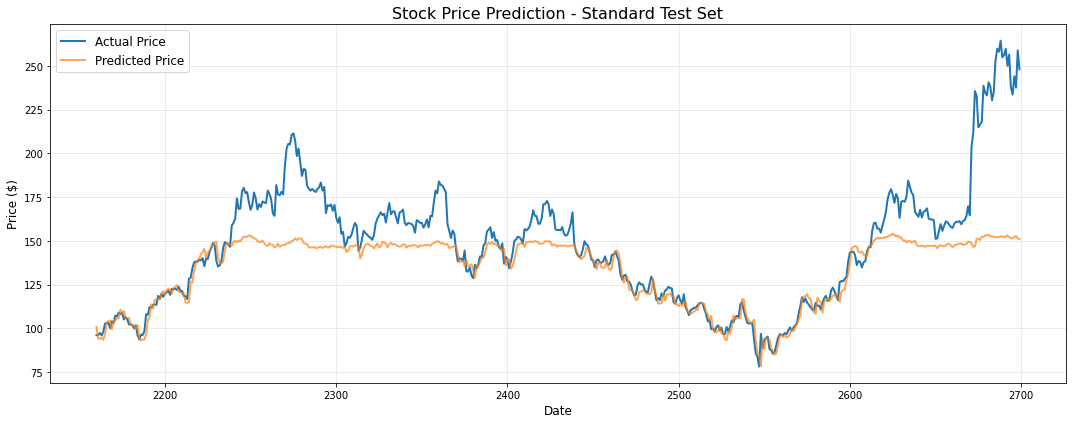

In [74]:
plt.figure(figsize=(15, 6))
plt.plot(df.index[split_index:], y_test.values, label='Actual Price', linewidth=2)
plt.plot(df.index[split_index:], y_pred, label='Predicted Price', linewidth=2, alpha=0.7)
plt.title('Stock Price Prediction - Standard Test Set', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### CVX

In [75]:
df2 = pd.read_csv("../data/cvx_data.csv")
df2

,Date,Close,Open,High,Low,Volume,momentum_rsi,momentum_stoch,momentum_roc,momentum_wr,trend_macd,trend_macd_signal,trend_ema_fast,trend_ema_slow,volatility_bbh,volatility_bbl,volatility_atr
0,2015-02-20,3.060000,3.030000,3.130000,3.020000,10666700,60.597387,56.944440,10.869564,-43.055560,0.127181,0.128352,3.017328,2.890147,3.377431,2.414569,0.132561
1,2015-02-23,3.060000,3.050000,3.100000,3.030000,6323500,60.597387,55.072460,7.368423,-44.927540,0.121164,0.126915,3.023893,2.902729,3.366558,2.486442,0.126305
2,2015-02-24,3.110000,3.060000,3.120000,3.020000,10916300,62.993571,57.377043,-6.042298,-42.622957,0.119058,0.125343,3.037140,2.918082,3.373224,2.529776,0.123674
3,2015-02-25,3.100000,3.080000,3.140000,3.060000,6151300,62.179140,46.000004,2.310229,-53.999996,0.115253,0.123325,3.046811,2.931558,3.381391,2.561609,0.119307
4,2015-02-26,3.080000,3.100000,3.130000,3.060000,8680900,60.494568,53.571383,1.315788,-46.428617,0.109363,0.120533,3.051917,2.942554,3.374810,2.613190,0.114376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,2025-11-10,243.979996,242.139999,248.899994,240.500000,43361600,56.150155,45.570222,3.825690,-54.429778,12.174842,16.326362,245.220570,233.045727,269.247469,220.280528,12.836743
2698,2025-11-11,237.520004,241.660004,248.460007,234.639999,61336800,52.638648,30.348748,-6.088879,-69.651252,10.658712,15.192832,244.035867,233.377155,267.272901,224.198096,12.935070
2699,2025-11-12,258.890015,253.130005,263.510010,250.000000,108942000,61.267867,80.702228,-0.300381,-19.297772,11.054124,14.365090,246.321121,235.266997,268.753819,224.746180,14.240563
2700,2025-11-13,247.960007,251.899994,259.630005,246.059998,63025700,55.679988,54.948196,-3.895199,-45.051804,10.366037,13.565280,246.573257,236.207220,268.702529,226.137470,14.173508


In [76]:
df2['Target'] = df2['Close'].shift(-1)
df2

,Date,Close,Open,High,Low,Volume,momentum_rsi,momentum_stoch,momentum_roc,momentum_wr,trend_macd,trend_macd_signal,trend_ema_fast,trend_ema_slow,volatility_bbh,volatility_bbl,volatility_atr,Target
0,2015-02-20,3.060000,3.030000,3.130000,3.020000,10666700,60.597387,56.944440,10.869564,-43.055560,0.127181,0.128352,3.017328,2.890147,3.377431,2.414569,0.132561,3.060000
1,2015-02-23,3.060000,3.050000,3.100000,3.030000,6323500,60.597387,55.072460,7.368423,-44.927540,0.121164,0.126915,3.023893,2.902729,3.366558,2.486442,0.126305,3.110000
2,2015-02-24,3.110000,3.060000,3.120000,3.020000,10916300,62.993571,57.377043,-6.042298,-42.622957,0.119058,0.125343,3.037140,2.918082,3.373224,2.529776,0.123674,3.100000
3,2015-02-25,3.100000,3.080000,3.140000,3.060000,6151300,62.179140,46.000004,2.310229,-53.999996,0.115253,0.123325,3.046811,2.931558,3.381391,2.561609,0.119307,3.080000
4,2015-02-26,3.080000,3.100000,3.130000,3.060000,8680900,60.494568,53.571383,1.315788,-46.428617,0.109363,0.120533,3.051917,2.942554,3.374810,2.613190,0.114376,3.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,2025-11-10,243.979996,242.139999,248.899994,240.500000,43361600,56.150155,45.570222,3.825690,-54.429778,12.174842,16.326362,245.220570,233.045727,269.247469,220.280528,12.836743,237.520004
2698,2025-11-11,237.520004,241.660004,248.460007,234.639999,61336800,52.638648,30.348748,-6.088879,-69.651252,10.658712,15.192832,244.035867,233.377155,267.272901,224.198096,12.935070,258.890015
2699,2025-11-12,258.890015,253.130005,263.510010,250.000000,108942000,61.267867,80.702228,-0.300381,-19.297772,11.054124,14.365090,246.321121,235.266997,268.753819,224.746180,14.240563,247.960007
2700,2025-11-13,247.960007,251.899994,259.630005,246.059998,63025700,55.679988,54.948196,-3.895199,-45.051804,10.366037,13.565280,246.573257,236.207220,268.702529,226.137470,14.173508,252.962906


In [78]:
df2[['Close', 'Target']].tail() # works fine

,Close,Target
2696,233.539993,243.979996
2697,243.979996,237.520004
2698,237.520004,258.890015
2699,258.890015,247.960007
2700,247.960007,252.962906


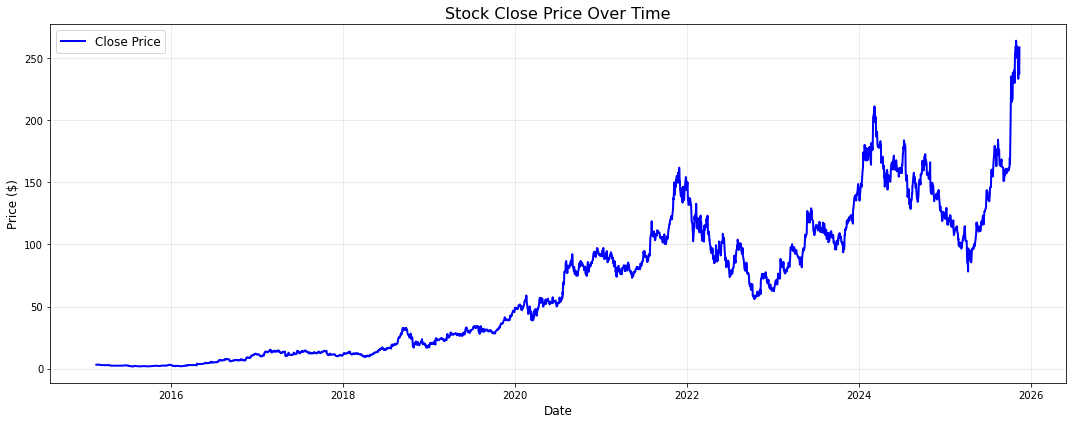

In [88]:
df2['Date'] = pd.to_datetime(df2['Date'])

plt.figure(figsize=(15, 6))
plt.plot(df2['Date'], df2['Close'], label='Close Price', color='blue', linewidth=2)
plt.title('Stock Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [86]:
X2 = df2[feature_columns]
y2 = df2['Target']

print(f"Features shape (X): {X2.shape}")
print(f"Target shape (y): {y2.shape}")

Features shape (X): (2700, 16)
Target shape (y): (2700,)


In [80]:
# Split: 80% train, 20% test
# also keeps the time order
split_index2 = int(len(df2) * 0.8)

X_train2 = X2[:split_index2]
X_test2 = X2[split_index2:]
y_train2 = y2[:split_index2]
y_test2 = y2[split_index2:]

print(f"Training data: {len(X_train2)} days")
print(f"Testing data: {len(X_test2)} days")
print(f"Training period: {df2.index[0]} to {df2.index[split_index2-1]}")
print(f"Testing period: {df2.index[split_index2]} to {df2.index[-1]}")

Training data: 2160 days
Testing data: 541 days
Training period: 0 to 2159
Testing period: 2160 to 2700


In [81]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,      # num of trees
    max_depth=25,          # to prevent overfitting
    random_state=42,       # to make it reproducible
)

# Train model
print("Started training process ...")
model.fit(X_train2, y_train2)
print("Training complete!")

Started training process ...
Training complete!


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred2 = model.predict(X_test2)

mae2 = mean_absolute_error(y_test2, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r22 = r2_score(y_test2, y_pred2)

print("STANDARD TEST RESULTS")
print("=" * 50)
print(f"Mean Absolute Error: ${mae2:.2f}")
print(f"Root Mean Squared Error: ${rmse2:.2f}")
print(f"R² Score: {r22:.4f}")
print("=" * 50)

STANDARD TEST RESULTS
Mean Absolute Error: $14.30
Root Mean Squared Error: $25.58
R² Score: 0.4740


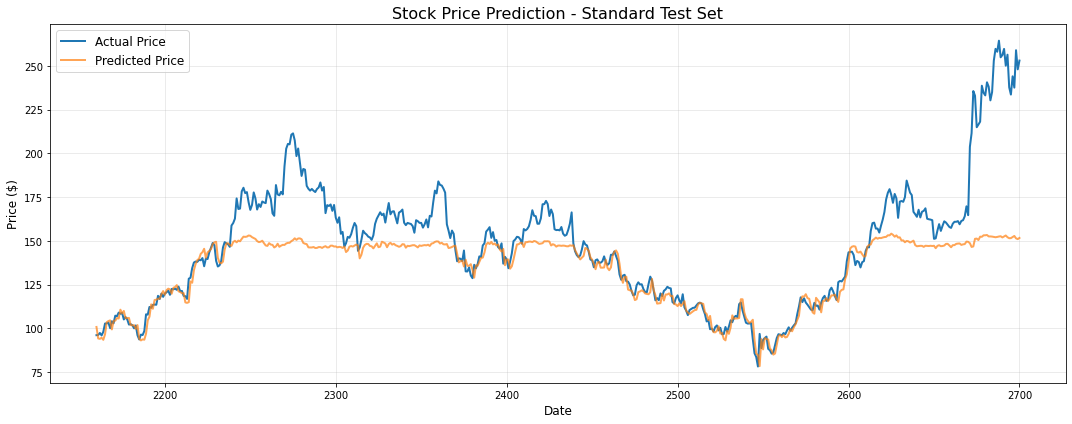

In [83]:
plt.figure(figsize=(15, 6))
plt.plot(df2.index[split_index2:], y_test2.values, label='Actual Price', linewidth=2)
plt.plot(df2.index[split_index2:], y_pred2, label='Predicted Price', linewidth=2, alpha=0.7)
plt.title('Stock Price Prediction - Standard Test Set', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [59]:
print("df1 shape:", df.shape)
print("df2 shape:", df2.shape)

print("Split index 1:", split_index)
print("Split index 2:", split_index2)

print("X_test shape:", X_test.shape)
print("X_test2 shape:", X_test2.shape)

print("First 5 y_pred:", y_pred[:5])
print("First 5 y_pred2:", y_pred2[:5])

df1 shape: (2700, 18)
df2 shape: (2701, 18)
Split index 1: 2160
Split index 2: 2160
X_test shape: (540, 16)
X_test2 shape: (541, 16)
First 5 y_pred: [100.79899956  94.2463987   94.01719879  94.63349899  93.4518988 ]
First 5 y_pred2: [100.79899956  94.2463987   94.01719879  94.63349899  93.4518988 ]


### Results